# Installation of Program
>**1. Installation of Anaconda**  
: https://www.anaconda.com/download/

>**2. Update of PIP**  
1) Execution of "Anaconda Prompt" by Administratior  
2) pip install --upgrade pip  
or  
2) C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip  

>**3. Installation of Jupyter Lab**  
: pip install jupyterlab

>**4. Change Start Location of Jupyter Lab**  
1) Right Click the Icon of "Jupyter Notebook"  
2) Input the target location (ex. X:\) to the end of "대상" and to the "시작 위치"  

# Setting of Analysis 
> **1. Import Library**

In [1]:
!pip install xgboost
!pip install lightgbm

In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Setting of Analysis
> **1. Import Library**  
> **2. Data Loading**  [(Data Source and Description)](https://www.kaggle.com/c/bike-sharing-demand/data)

In [2]:
url_all = 'https://raw.githubusercontent.com/cheonbi/DataScience/master/Time_Series_Analysis_with_Python/Data/all.csv'
raw_all = pd.read_csv(url_all)
raw_all.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.8400,14.3950,81,0.0000,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.0200,13.6350,80,0.0000,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.0200,13.6350,80,0.0000,5,27,32
3,2011-01-01 3:00,1,0,0,1,9.8400,14.3950,75,0.0000,3,10,13
4,2011-01-01 4:00,1,0,0,1,9.8400,14.3950,75,0.0000,0,1,1


![](https://wikidocs.net/images/page/22122/1.png)

# Setting of Analysis
> **1. Import Library**  
> **2. Data Loading**  [(Data Source and Description)](https://www.kaggle.com/c/bike-sharing-demand/data)  
> **3. Rearrange of Data**  

In [3]:
raw_all['temp_group'] = pd.cut(raw_all['temp'], 10)
if 'datetime' in raw_all.columns:
    raw_all['DateTime'] = pd.to_datetime(raw_all['datetime'])
    del raw_all['datetime']
raw_all['Year'] = raw_all.DateTime.dt.year
raw_all['Quater'] = raw_all.DateTime.dt.quarter
raw_all['Quater_ver2'] = raw_all['Quater'] + (raw_all.Year - raw_all.Year.min()) * 4
raw_all['Month'] = raw_all.DateTime.dt.month
raw_all['Day'] = raw_all.DateTime.dt.day
raw_all['Hour'] = raw_all.DateTime.dt.hour
raw_all['DayofWeek'] = raw_all.DateTime.dt.dayofweek
raw_all.info()

if raw_all.index.dtype == 'int64':
    raw_all.set_index('DateTime', inplace=True)
display(raw_all.head())
# bring back
# if raw_all.index.dtype != 'int64':
#     raw_all.reset_index(drop=False, inplace=True)
# display(raw_all.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 20 columns):
season         17379 non-null int64
holiday        17379 non-null int64
workingday     17379 non-null int64
weather        17379 non-null int64
temp           17379 non-null float64
atemp          17379 non-null float64
humidity       17379 non-null int64
windspeed      17379 non-null float64
casual         17379 non-null int64
registered     17379 non-null int64
count          17379 non-null int64
temp_group     17379 non-null category
DateTime       17379 non-null datetime64[ns]
Year           17379 non-null int64
Quater         17379 non-null int64
Quater_ver2    17379 non-null int64
Month          17379 non-null int64
Day            17379 non-null int64
Hour           17379 non-null int64
DayofWeek      17379 non-null int64
dtypes: category(1), datetime64[ns](1), float64(3), int64(15)
memory usage: 2.5 MB


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,temp_group,Year,Quater,Quater_ver2,Month,Day,Hour,DayofWeek
DateTime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.8400,14.3950,81,0.0000,3,13,16,"(8.856, 12.874]",2011,1,1,1,1,0,5
2011-01-01 01:00:00,1,0,0,1,9.0200,13.6350,80,0.0000,8,32,40,"(8.856, 12.874]",2011,1,1,1,1,1,5
2011-01-01 02:00:00,1,0,0,1,9.0200,13.6350,80,0.0000,5,27,32,"(8.856, 12.874]",2011,1,1,1,1,2,5
2011-01-01 03:00:00,1,0,0,1,9.8400,14.3950,75,0.0000,3,10,13,"(8.856, 12.874]",2011,1,1,1,1,3,5
2011-01-01 04:00:00,1,0,0,1,9.8400,14.3950,75,0.0000,0,1,1,"(8.856, 12.874]",2011,1,1,1,1,4,5


# Setting of Analysis
> **1. Import Library**  
> **2. Data Loading**  [(Data Source and Description)](https://www.kaggle.com/c/bike-sharing-demand/data)  
> **3. Rearrange of Data**  
> **4. Split of Data: Train, Validate, Test Sets**  

In [4]:
# Reference: https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
# we usually split our data into two subsets: Training data and Testing data (and sometimes to three: Train, Validata and Test data)
# Overfitting: when the model is too complex (i.e. too many features/variables compared to the number of observation)
# Just Accurate on Training but not on Testing
# Underfitting: when this is usually the result of a very simple model (not enough predictors/independent variables)
# Just not Accurate on Training and Testing

# Setting of X and Y
Y_colname = ['count']
X_remove = ['casual', 'registered']
X_colname = [x for x in raw_all.columns if x not in Y_colname+X_remove]

# if the data is not a time-series
# from sklearn.model_selection import train_test_split
# raw_train, raw_test = train_test_split(raw_all, test_size=0.2, random_state=123)
# print(raw_train.shape, raw_test.shape)

# X_train, X_test, Y_train, Y_test = train_test_split(raw_all[X_colname], raw_all[Y_colname], test_size=0.2, random_state=123)
# print(X_train.shape, Y_train.shape)
# print(X_test.shape, Y_test.shape)

# if the data is a time-series
# raw_train = raw_all.loc[raw_all.Day < 20,:]
# raw_test = raw_all.loc[raw_all.Day >= 20,:]
# print(raw_train.shape, raw_test.shape)
# or
raw_train = raw_all.loc[raw_all.index < '2012-07-01',:]
raw_test = raw_all.loc[raw_all.index >= '2012-07-01',:]
print(raw_train.shape, raw_test.shape)

Y_train = raw_train[Y_colname]
X_train = raw_train[X_colname]
Y_test = raw_test[Y_colname]
X_test = raw_test[X_colname]
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


(13003, 19) (4376, 19)
(13003, 16) (13003, 1)
(4376, 16) (4376, 1)


# Setting of Analysis
> **1. Import Library**  
> **2. Data Loading**  [(Data Source and Description)](https://www.kaggle.com/c/bike-sharing-demand/data)   
> **3. Rearrange of Data**  
> **4. Split of Data: Train, Validate, Test Sets**  
> **5. Descriptive Statistics and Getting Insight from Features**  

In [5]:
raw_train.shape
raw_train.head()
raw_train.tail()
raw_train.isnull()
raw_train.isnull().sum()
raw_train.isnull().describe()
raw_train.info()
raw_train.dtypes
raw_train.describe()
raw_train.describe().T
raw_train.describe(include='all').T
pd.concat([raw_train.dtypes, raw_train.describe(include='all').T], axis=1)
raw_train.hist(bins=20, grid=True, figsize=(16,12))
plt.close('all')

raw_train.boxplot(column='count', by='season', grid=True, figsize=(12,5))
plt.ylim(0,1000)
raw_train.boxplot(column='registered', by='season', grid=True, figsize=(12,5))
plt.ylim(0,1000)
raw_train.boxplot(column='casual', by='season', grid=True, figsize=(12,5))
plt.ylim(0,1000)
plt.close('all')

raw_train.boxplot(column='count', by='holiday', grid=True, figsize=(12,5))
plt.ylim(0,1000)
raw_train.boxplot(column='count', by='workingday', grid=True, figsize=(12,5))
plt.ylim(0,1000)
plt.close('all')

raw_train.boxplot(column='count', by='holiday', grid=True, figsize=(12,5))
plt.ylim(0,1000)
raw_train.boxplot(column='count', by='workingday', grid=True, figsize=(12,5))
plt.ylim(0,1000)
raw_train[raw_train.workingday == 1]
raw_train[raw_train.workingday == 1].boxplot(column='count', by='Hour', grid=True, figsize=(12,5))
raw_train[raw_train.workingday == 0].boxplot(column='count', by='Hour', grid=True, figsize=(12,5))
raw_train[raw_train.workingday == 1].plot.scatter(y='count', x='Hour', grid=True, figsize=(12,5))
raw_train[raw_train.workingday == 0].plot.scatter(y='count', x='Hour', grid=True, figsize=(12,5))
raw_train[raw_train.workingday == 1].plot.scatter(y='count', x='Hour', c='temp', grid=True, figsize=(12,5), colormap='viridis')
raw_train[raw_train.workingday == 0].plot.scatter(y='count', x='Hour', c='temp', grid=True, figsize=(12,5), colormap='viridis')
plt.close('all')

raw_train.plot.scatter(y='count', x='DayofWeek', c='temp', grid=True, figsize=(12,5), colormap='viridis')
raw_train.boxplot(column='count', by='DayofWeek', grid=True, figsize=(12,5))
plt.close('all')

raw_train.boxplot(column='count', by='weather', grid=True, figsize=(12,5))
plt.ylim(0,1000)
raw_train.boxplot(column='registered', by='weather', grid=True, figsize=(12,5))
plt.ylim(0,1000)
raw_train.boxplot(column='casual', by='weather', grid=True, figsize=(12,5))
plt.ylim(0,1000)
plt.close('all')

pd.DataFrame(raw_train['weather'].value_counts()/raw_train['weather'].value_counts().sum()*100).T
pd.crosstab(index=raw_train['count'], columns=raw_train['weather'], margins=True)
sub_table = pd.crosstab(index=raw_train['count'], columns=raw_train['weather'], margins=True)
sub_table/sub_table.loc['All']*100

raw_train.groupby('weather').describe().T
raw_train.groupby(['weather', 'DayofWeek']).describe()
raw_train.groupby(['weather', 'DayofWeek']).count()
raw_train.groupby(['weather', 'DayofWeek']).mean()
raw_train.groupby(['weather', 'DayofWeek']).agg({'count':'mean'})
raw_train.groupby(['weather', 'DayofWeek']).agg({'count':[sum, min, max]})
raw_train.groupby(['weather', 'DayofWeek']).agg({'count':[sum, min, max]}).hist(grid=True, figsize=(12,8))
plt.close('all')

raw_train.groupby('weather').groups.keys()
raw_train.groupby('weather').groups.items()
for key, item in raw_train.groupby('weather'):
#     display(key, item)
    display(raw_train.groupby('weather').get_group(key).head())
   
pd.cut(raw_train['temp'], 10)
pd.cut(raw_train['temp'], 10).value_counts()
raw_train.groupby(pd.cut(raw_train['temp'], 10)).describe().T

raw_train.plot.scatter(y='count', x='temp', grid=True, figsize=(12,5))
raw_train.boxplot(column='count', by='temp', grid=True, figsize=(12,5))
raw_train.boxplot(column='count', by='temp_group', grid=True, figsize=(12,5))
plt.close('all')

raw_train.plot.scatter(y='count', x='humidity', c='temp', grid=True, figsize=(12,5), colormap='viridis')
raw_train.boxplot(column='count', by='humidity', grid=True, figsize=(12,5))
raw_train.boxplot(column='count', by='windspeed', grid=True, figsize=(12,5))
raw_train.boxplot(column='count', by='windspeed', grid=True, figsize=(12,5))
raw_train.boxplot(column='count', by='Year', grid=True, figsize=(12,5))
raw_train.boxplot(column='count', by='Month', grid=True, figsize=(12,5))
raw_train.plot.scatter(y='count', x='Month', c='temp', grid=True, figsize=(12,5), colormap='viridis')
plt.close('all')

pd.plotting.scatter_matrix(raw_train, figsize=(18,18), diagonal='kde')
plt.close('all')

raw_train.corr()
raw_train.corr().style.background_gradient()
raw_train.corr().style.background_gradient().set_precision(2)
raw_train.corr().style.background_gradient().set_precision(2).set_properties(**{'font-size': '15pt'})
raw_train.corr().iloc[:,8:11]
raw_train.corr().loc[:, ['casual', 'registered', 'count']]
raw_train.corr().loc[:, ['casual', 'registered', 'count']].style.background_gradient().set_precision(2).set_properties(**{'font-size': '15pt'})
raw_train.corr().iloc[0:8,8:11].style.background_gradient().set_precision(2).set_properties(**{'font-size': '15pt'})
plt.close('all')

raw_train[['count','registered','casual']].plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20,
                                               xlim=('2012-01-01', '2012-06-01'), ylim=(0,1000))
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)

raw_train[['count']].plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20,
                                               xlim=('2012-01-01', '2012-06-01'), ylim=(0,1000))
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)

raw_train[['count']].rolling(20).mean().plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20,
                                             xlim=('2012-01-01', '2012-06-01'), ylim=(0,1000))
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)

pd.concat([raw_train[['count']],
           raw_train[['count']].rolling(10).mean(),
           raw_train[['count']].rolling(20).mean()], axis=1).plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20,
                                                                  xlim=('2012-01-01', '2012-02-01'), ylim=(0,1000))
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)

raw_train[['count']].diff().plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20,
                                 xlim=('2012-01-01', '2012-06-01'), ylim=(-1000,1000))
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.close('all')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13003 entries, 2011-01-01 00:00:00 to 2012-06-30 23:00:00
Data columns (total 19 columns):
season         13003 non-null int64
holiday        13003 non-null int64
workingday     13003 non-null int64
weather        13003 non-null int64
temp           13003 non-null float64
atemp          13003 non-null float64
humidity       13003 non-null int64
windspeed      13003 non-null float64
casual         13003 non-null int64
registered     13003 non-null int64
count          13003 non-null int64
temp_group     13003 non-null category
Year           13003 non-null int64
Quater         13003 non-null int64
Quater_ver2    13003 non-null int64
Month          13003 non-null int64
Day            13003 non-null int64
Hour           13003 non-null int64
DayofWeek      13003 non-null int64
dtypes: category(1), float64(3), int64(15)
memory usage: 1.9 MB


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,temp_group,Year,Quater,Quater_ver2,Month,Day,Hour,DayofWeek
DateTime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.8400,14.3950,81,0.0000,3,13,16,"(8.856, 12.874]",2011,1,1,1,1,0,5
2011-01-01 01:00:00,1,0,0,1,9.0200,13.6350,80,0.0000,8,32,40,"(8.856, 12.874]",2011,1,1,1,1,1,5
2011-01-01 02:00:00,1,0,0,1,9.0200,13.6350,80,0.0000,5,27,32,"(8.856, 12.874]",2011,1,1,1,1,2,5
2011-01-01 03:00:00,1,0,0,1,9.8400,14.3950,75,0.0000,3,10,13,"(8.856, 12.874]",2011,1,1,1,1,3,5
2011-01-01 04:00:00,1,0,0,1,9.8400,14.3950,75,0.0000,0,1,1,"(8.856, 12.874]",2011,1,1,1,1,4,5


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,temp_group,Year,Quater,Quater_ver2,Month,Day,Hour,DayofWeek
DateTime,,,,,,,,,,,,,,,,,,,
2011-01-01 05:00:00,1,0,0,2,9.8400,12.8800,75,6.0032,0,1,1,"(8.856, 12.874]",2011,1,1,1,1,5,5
2011-01-01 13:00:00,1,0,0,2,18.8600,22.7250,72,19.9995,47,47,94,"(16.892, 20.91]",2011,1,1,1,1,13,5
2011-01-01 14:00:00,1,0,0,2,18.8600,22.7250,72,19.0012,35,71,106,"(16.892, 20.91]",2011,1,1,1,1,14,5
2011-01-01 15:00:00,1,0,0,2,18.0400,21.9700,77,19.9995,40,70,110,"(16.892, 20.91]",2011,1,1,1,1,15,5
2011-01-01 16:00:00,1,0,0,2,17.2200,21.2100,82,19.9995,41,52,93,"(16.892, 20.91]",2011,1,1,1,1,16,5


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,temp_group,Year,Quater,Quater_ver2,Month,Day,Hour,DayofWeek
DateTime,,,,,,,,,,,,,,,,,,,
2011-01-01 18:00:00,1,0,0,3,17.2200,21.2100,88,16.9979,9,26,35,"(16.892, 20.91]",2011,1,1,1,1,18,5
2011-01-01 19:00:00,1,0,0,3,17.2200,21.2100,88,16.9979,6,31,37,"(16.892, 20.91]",2011,1,1,1,1,19,5
2011-01-02 06:00:00,1,0,0,3,17.2200,21.2100,77,19.9995,0,2,2,"(16.892, 20.91]",2011,1,1,1,2,6,6
2011-01-02 08:00:00,1,0,0,3,16.4000,20.4550,71,15.0013,0,8,8,"(12.874, 16.892]",2011,1,1,1,2,8,6
2011-01-02 14:00:00,1,0,0,3,14.7600,17.4250,76,12.9980,4,55,59,"(12.874, 16.892]",2011,1,1,1,2,14,6


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,temp_group,Year,Quater,Quater_ver2,Month,Day,Hour,DayofWeek
DateTime,,,,,,,,,,,,,,,,,,,
2011-01-26 16:00:00,1,0,1,4,9.0200,9.8500,93,22.0028,1,35,36,"(8.856, 12.874]",2011,1,1,1,26,16,2
2012-01-09 18:00:00,1,0,1,4,8.2000,11.3650,86,6.0032,6,158,164,"(4.838, 8.856]",2012,1,5,1,9,18,0
2012-01-21 01:00:00,1,0,0,4,5.7400,6.8200,86,12.9980,1,22,23,"(4.838, 8.856]",2012,1,5,1,21,1,5


# Setting of Analysis
> **1. Import Library**  
> **2. Data Loading**  [(Data Source and Description)](https://www.kaggle.com/c/bike-sharing-demand/data)  
> **3. Rearrange of Data**  
> **4. Split of Data: Train, Validate, Test Sets**  
> **5. Descriptive Statistics and Getting Insight from Features**  
> **6. Applying Models**  

In [6]:
# Confirm of input and output
drop_column = ['temp_group']
# X_train.drop(columns=drop_column, inplace=True)
# X_test.drop(columns=drop_column, inplace=True)
# or
for sub_col in drop_column:
    if sub_col in X_train.columns:
        X_train.drop(columns=sub_col, inplace=True)
        X_test.drop(columns=sub_col, inplace=True)

from sklearn.linear_model import LinearRegression, Lasso, ElasticNet 
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# LinearRegression (using sklearn)
model_fit_reg1 = LinearRegression(fit_intercept=True, normalize=False).fit(X_train, Y_train)
# display(pd.concat([pd.DataFrame(X_train.columns, columns=['Features']), pd.DataFrame(model_fit_reg1.coef_, index=['Coefficients']).T], axis=1))
model_pred_tr_reg1 = model_fit_reg1.predict(X_train)
model_pred_te_reg1 = model_fit_reg1.predict(X_test)

# LinearRegression (using statsmodels)
model_fit_reg2 = sm.OLS(Y_train, X_train).fit()
# display(model_fit_reg2.summary())
model_pred_tr_reg2 = model_fit_reg2.predict(X_train)
model_pred_te_reg2 = model_fit_reg2.predict(X_test)

# Lasso
model_fit_reg3 = Lasso(alpha=0.5, fit_intercept=True, normalize=False, random_state=123).fit(X_train, Y_train)
model_pred_tr_reg3 = model_fit_reg3.predict(X_train)
model_pred_te_reg3 = model_fit_reg3.predict(X_test)

# ElasticNet
model_fit_reg4 = ElasticNet(alpha=0.1, l1_ratio=0.1, fit_intercept=True, normalize=False, random_state=123).fit(X_train, Y_train)
model_pred_tr_reg4 = model_fit_reg4.predict(X_train)
model_pred_te_reg4 = model_fit_reg4.predict(X_test)

# GradientBoostingRegression
model_fit_reg5 = GradientBoostingRegressor(alpha=0.1, learning_rate=0.05, loss='huber', criterion='friedman_mse',
                                           n_estimators=1000, random_state=123).fit(X_train, Y_train)
model_pred_tr_reg5 = model_fit_reg5.predict(X_train)
model_pred_te_reg5 = model_fit_reg5.predict(X_test)

# # XGBoost
# model_fit_reg6 = XGBRegressor(learning_rate=0.05, n_estimators=100, random_state=123).fit(X_train, Y_train)
# model_pred_tr_reg6 = model_fit_reg6.predict(X_train)
# model_pred_te_reg6 = model_fit_reg6.predict(X_test)

# LightGMB
model_fit_reg7 = LGBMRegressor(learning_rate=0.05, n_estimators=100, random_state=123).fit(X_train, Y_train)
model_pred_tr_reg7 = model_fit_reg7.predict(X_train)
model_pred_te_reg7 = model_fit_reg7.predict(X_test)

# RandomForestRegressor
model_fit_reg8 = RandomForestRegressor(n_estimators=100, random_state=123).fit(X_train, Y_train)
model_pred_tr_reg8 = model_fit_reg8.predict(X_train)
model_pred_te_reg8 = model_fit_reg8.predict(X_test)

# DecisionTree
from sklearn import tree
model_fit_reg9 = tree.DecisionTreeRegressor().fit(X_train, Y_train)
model_pred_tr_reg9 = model_fit_reg9.predict(X_train)
model_pred_te_reg9 = model_fit_reg9.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


# Setting of Analysis
> **1. Import Library**  
> **2. Data Loading**  [(Data Source and Description)](https://www.kaggle.com/c/bike-sharing-demand/data)  
> **3. Rearrange of Data**  
> **4. Split of Data: Train, Validate, Test Sets**  
> **5. Descriptive Statistics and Getting Insight from Features**  
> **6. Applying Models**  
> **7. Evaluation**  

In [7]:
# pd.concat([Y_train, pd.DataFrame(model_pred_tr_reg1, index=Y_train.index, columns=['prediction'])], axis=1).plot(kind='line', figsize=(20,6),
#                                                                                                                xlim=(Y_train.index.min(),Y_train.index.max()),
#                                                                                                                linewidth=3, fontsize=20)
# plt.title('Time Series of Target', fontsize=20)
# plt.xlabel('Index', fontsize=15)
# plt.ylabel('Target Value', fontsize=15)

# MAD = abs(Y_train - model_pred_tr_reg1).values.mean()
# MSE = ((Y_train - model_pred_tr_reg1)**2).values.mean()
# MAPE = (abs(Y_train - model_pred_tr_reg1)/Y_train*100).values.mean()

# display(pd.DataFrame([MAD, MSE, MAPE], index=['MAD', 'MSE', 'MAPE'], columns=['Score']).T)

# Evaluation(Functionalize)
def Evaluation(Y_real, Y_pred):
    Y_pred = pd.DataFrame(Y_pred).values
   
    pd.concat([Y_real, pd.DataFrame(Y_pred, index=Y_real.index, columns=['prediction'])], axis=1).plot(kind='line', figsize=(20,6),
                                                                                                               xlim=(Y_real.index.min(),Y_real.index.max()),
                                                                                                               linewidth=3, fontsize=20)
    plt.title('Time Series of Target', fontsize=20)
    plt.xlabel('Index', fontsize=15)
    plt.ylabel('Target Value', fontsize=15)
   
    MAD = abs(Y_real - Y_pred).values.mean()
    MSE = ((Y_real - Y_pred)**2).values.mean()
    MAPE = (abs(Y_real - Y_pred)/Y_real*100).values.mean()
    Score = pd.DataFrame([MAD, MSE, MAPE], index=['MAD', 'MSE', 'MAPE'], columns=['Score']).T
    Residual = Y_real - Y_pred
    Residual.columns = ['Error']
    return Score, Residual

def Evaluation_TrTe(Y_real_tr, Y_pred_tr, Y_real_te, Y_pred_te):
    Score_tr, Residual_tr = Evaluation(Y_real_tr, Y_pred_tr)
    Score_te, Residual_te = Evaluation(Y_real_te, Y_pred_te)
    Score_trte = pd.concat([Score_tr, Score_te], axis=0)
    Score_trte.index = ['Train', 'Test']
    return Score_trte, Residual_tr, Residual_te
    

,MAD,MSE,MAPE
Train,25.0060,"1,360.5871",60.3094
Test,49.4532,"5,366.5208",51.2366


,MAD,MSE,MAPE
Train,8.2916,189.1715,11.7646
Test,47.4639,"5,358.4181",31.3604


,MAD,MSE,MAPE
Train,0.0000,0.0000,0.0000
Test,56.6330,"8,031.4653",36.8883


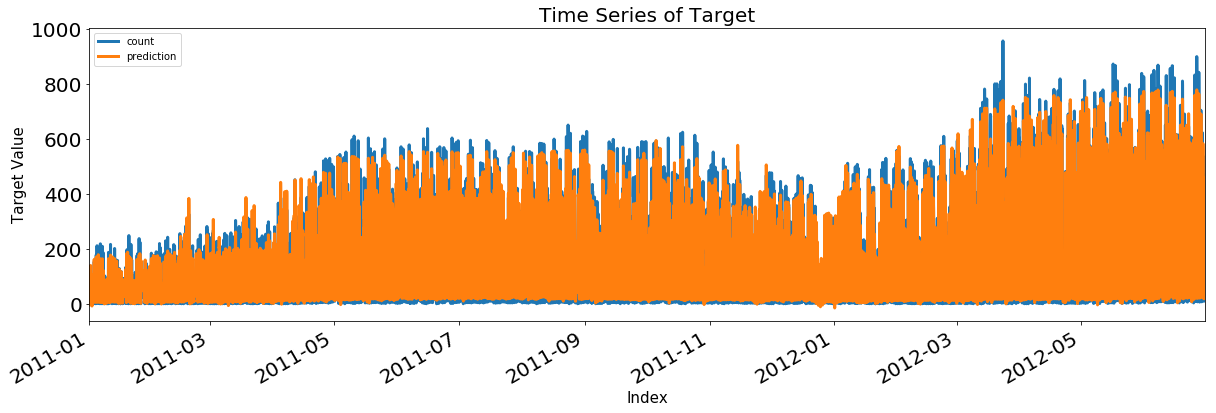

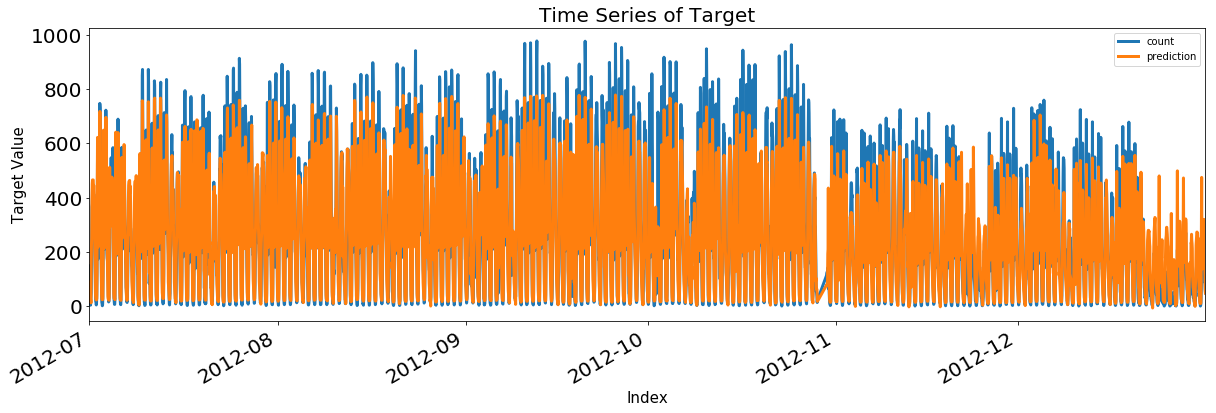

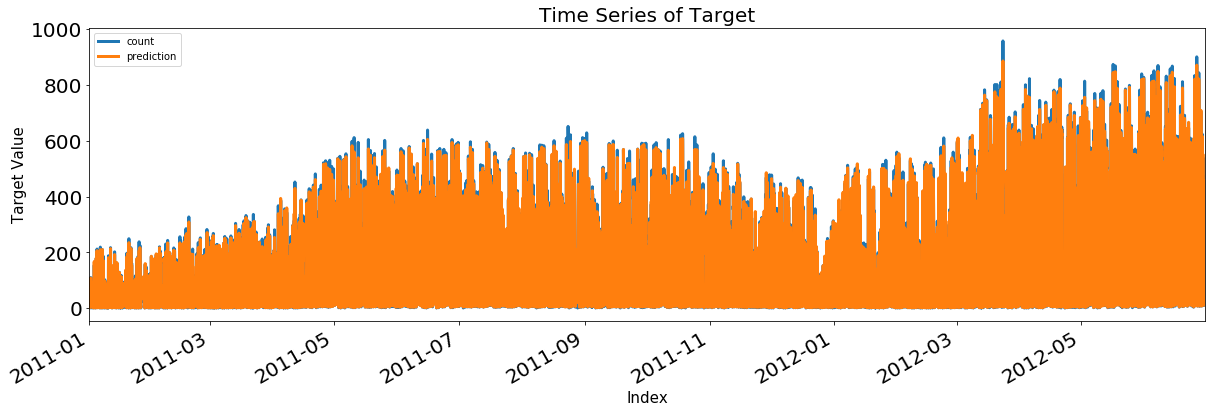

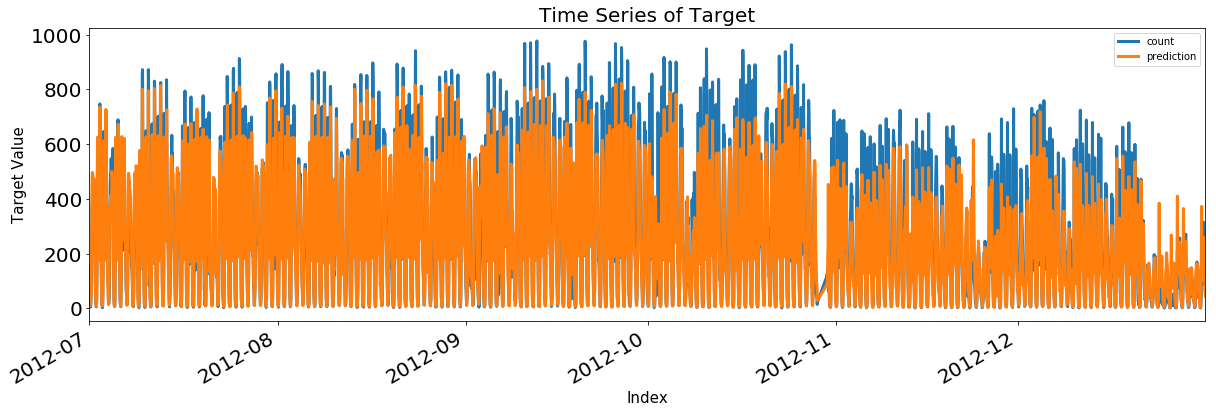

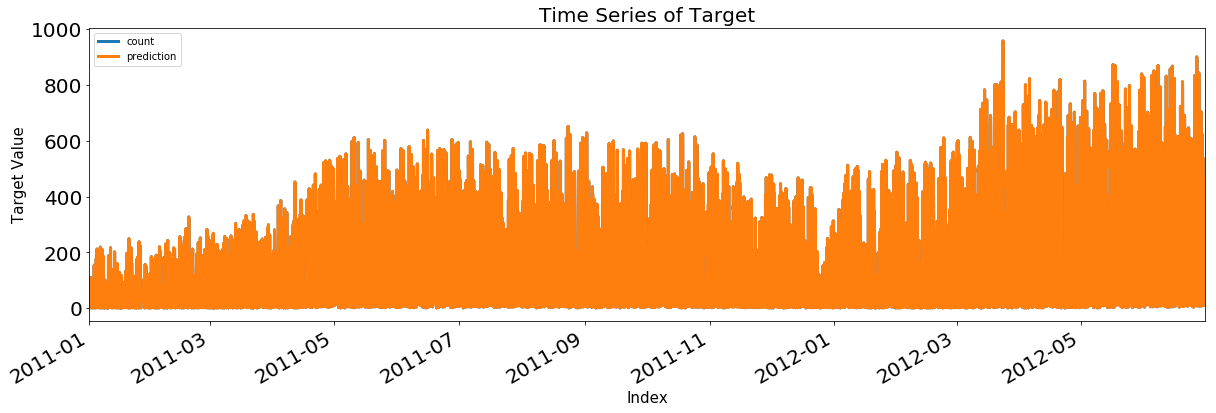

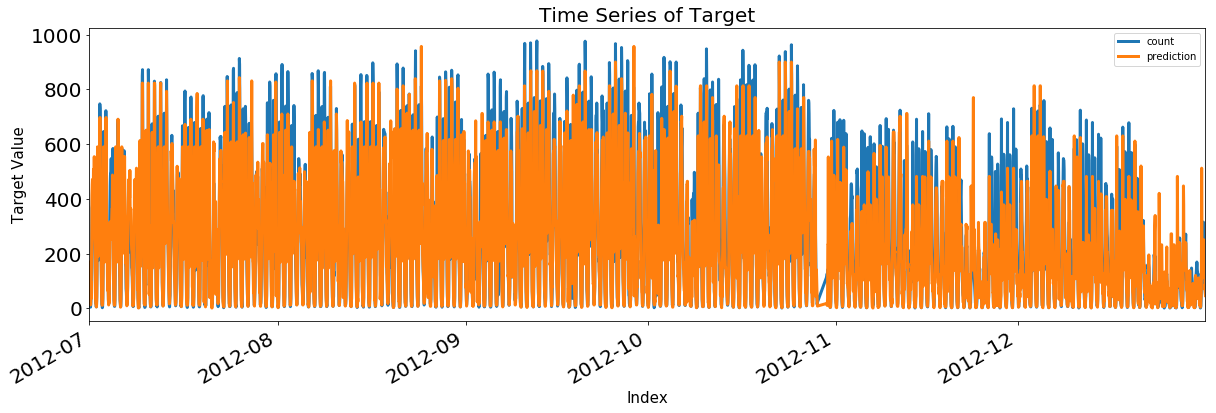

In [8]:
Score7, Resid_tr_reg7, Resid_te_reg7 = Evaluation_TrTe(Y_train, model_pred_tr_reg7, Y_test, model_pred_te_reg7)
display(Score7)
Score8, Resid_tr_reg8, Resid_te_reg8 = Evaluation_TrTe(Y_train, model_pred_tr_reg8, Y_test, model_pred_te_reg8)
display(Score8)
Score9, Resid_tr_reg9, Resid_te_reg9 = Evaluation_TrTe(Y_train, model_pred_tr_reg9, Y_test, model_pred_te_reg9)
display(Score9)

# Setting of Analysis
> **1. Import Library**  
> **2. Data Loading**  [(Data Source and Description)](https://www.kaggle.com/c/bike-sharing-demand/data)  
> **3. Rearrange of Data**  
> **4. Split of Data: Train, Validate, Test Sets**  
> **5. Descriptive Statistics and Getting Insight from Features**  
> **6. Applying Models**  
> **7. Evaluation**  
> **8. Error Analysis**  

In [9]:
# # Error Analysis(Plot)
# Resid_tr_reg1['RowNum'] = Resid_tr_reg1.reset_index().index

# # Stationarity(Trend) Analysis
# sns.set(palette="muted", color_codes=True, font_scale=2)
# sns.lmplot(x='RowNum', y='Error', data=Resid_tr_reg1,
#            fit_reg='True', size=7, aspect=2, ci=99, sharey=True)

# # Normal Distribution Analysis
# figure, axes = plt.subplots(figsize=(16,8))
# sns.distplot(Resid_tr_reg1['Error'], norm_hist='True', fit=stats.norm)

# # Lag Analysis
# length = int(len(Resid_tr_reg1['Error'])/10)
# figure, axes = plt.subplots(3, 2, figsize=(16,16))
# pd.plotting.lag_plot(Resid_tr_reg1['Error'].iloc[1:length], lag=1, ax=axes[0,0])
# pd.plotting.lag_plot(Resid_tr_reg1['Error'].iloc[1:length], lag=2, ax=axes[0,1])
# pd.plotting.lag_plot(Resid_tr_reg1['Error'].iloc[1:length], lag=3, ax=axes[1,0])
# pd.plotting.lag_plot(Resid_tr_reg1['Error'].iloc[1:length], lag=4, ax=axes[1,1])
# pd.plotting.lag_plot(Resid_tr_reg1['Error'].iloc[1:length], lag=10, ax=axes[2,0])
# pd.plotting.lag_plot(Resid_tr_reg1['Error'].iloc[1:length], lag=20, ax=axes[2,1])

# # Autocorrelation Analysis
# figure, axes = plt.subplots(2,1,figsize=(16,10))
# figure = sm.graphics.tsa.plot_acf(Resid_tr_reg1['Error'].iloc[1:length], lags=100, use_vlines=True, ax=axes[0])
# figure = sm.graphics.tsa.plot_pacf(Resid_tr_reg1['Error'].iloc[1:length], lags=100, use_vlines=True, ax=axes[1])

# # Error Analysis(Statistics)
# # Checking Stationarity
# # Null Hypothesis: The Time-series is non-stationalry
# Stationarity = pd.Series(sm.tsa.stattools.adfuller(Resid_tr_reg1['Error'])[0:4], index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
# for key, value in sm.tsa.stattools.adfuller(Resid_tr_reg1['Error'])[4].items():
#     Stationarity['Critical Value(%s)'%key] = value
# Stationarity['Maximum Information Criteria'] = sm.tsa.stattools.adfuller(Resid_tr_reg1['Error'])[5]
# Stationarity = pd.DataFrame(Stationarity, columns=['Stationarity'])

# # Checking of Normality
# # Null Hypothesis: The residuals are normally distributed
# Normality = pd.DataFrame([stats.shapiro(Resid_tr_reg1['Error'])], index=['Normality'], columns=['Test Statistics', 'p-value']).T

# # Checking for Autocorrelation
# # Null Hypothesis: Autocorrelation is absent
# Autocorrelation = pd.concat([pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Resid_tr_reg1['Error'], lags=[1,5,10,50])[0], columns=['Test Statistics']),
#                              pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Resid_tr_reg1['Error'], lags=[1,5,10,50])[1], columns=['p-value'])], axis=1).T
# Autocorrelation.columns = ['Autocorr(lag1)', 'Autocorr(lag5)', 'Autocorr(lag10)', 'Autocorr(lag50)']

# # Checking Heteroscedasticity
# # Null Hypothesis: Error terms are homoscedastic
# Heteroscedasticity = pd.DataFrame([sm.stats.diagnostic.het_goldfeldquandt(Resid_tr_reg1['Error'], X_train.values, alternative='two-sided')],
#                                   index=['Heteroscedasticity'], columns=['Test Statistics', 'p-value', 'Alternative']).T
# Error_Analysis = pd.concat([Stationarity, Normality, Autocorrelation, Heteroscedasticity], join='outer', axis=1)
# Error_Analysis = Error_Analysis.loc[['Test Statistics', 'p-value', 'Alternative', 'Used Lag', 'Used Observations',
#                                      'Critical Value(1%)', 'Critical Value(5%)', 'Critical Value(10%)',
#                                      'Maximum Information Criteria'],:]
# display(Error_Analysis)

# Error Analysis(Functionalize)
def Error_Analysis(Data, Target_name):
    for x in Target_name:
        Target_name = x
   
    ##### Error Analysis(Plot)
    Data['RowNum'] = Data.reset_index().index

    # Stationarity(Trend) Analysis
    sns.set(palette="muted", color_codes=True, font_scale=2)
    sns.lmplot(x='RowNum', y=Target_name, data=Data, fit_reg='True', size=7, aspect=2, ci=99, sharey=True)
   
    # Normal Distribution Analysis
    figure, axes = plt.subplots(figsize=(16,8))
    sns.distplot(Data[Target_name], norm_hist='True', fit=stats.norm)
   
    # Lag Analysis
    length = int(len(Data[Target_name])/10)
    figure, axes = plt.subplots(3, 2, figsize=(16,16))
    pd.plotting.lag_plot(Data[Target_name].iloc[1:length], lag=1, ax=axes[0,0])
    pd.plotting.lag_plot(Data[Target_name].iloc[1:length], lag=2, ax=axes[0,1])
    pd.plotting.lag_plot(Data[Target_name].iloc[1:length], lag=3, ax=axes[1,0])
    pd.plotting.lag_plot(Data[Target_name].iloc[1:length], lag=4, ax=axes[1,1])
    pd.plotting.lag_plot(Data[Target_name].iloc[1:length], lag=10, ax=axes[2,0])
    pd.plotting.lag_plot(Data[Target_name].iloc[1:length], lag=20, ax=axes[2,1])

    # Autocorrelation Analysis
    figure, axes = plt.subplots(2,1,figsize=(16,10))
    figure = sm.graphics.tsa.plot_acf(Data[Target_name].iloc[1:length], lags=100, use_vlines=True, ax=axes[0])
    figure = sm.graphics.tsa.plot_pacf(Data[Target_name].iloc[1:length], lags=100, use_vlines=True, ax=axes[1])
   
    ##### Error Analysis(Statistics)
    # Checking Stationarity
    # Null Hypothesis: The Time-series is non-stationalry
    Stationarity = pd.Series(sm.tsa.stattools.adfuller(Data[Target_name])[0:4],
                             index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
    for key, value in sm.tsa.stattools.adfuller(Data[Target_name])[4].items():
        Stationarity['Critical Value(%s)'%key] = value
        Stationarity['Maximum Information Criteria'] = sm.tsa.stattools.adfuller(Data[Target_name])[5]
        Stationarity = pd.DataFrame(Stationarity, columns=['Stationarity'])

    # Checking of Normality
    # Null Hypothesis: The residuals are normally distributed
    Normality = pd.DataFrame([stats.shapiro(Data[Target_name])],
                             index=['Normality'], columns=['Test Statistics', 'p-value']).T

    # Checking for Autocorrelation
    # Null Hypothesis: Autocorrelation is absent
    Autocorrelation = pd.concat([pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Data[Target_name], lags=[1,5,10,50])[0], columns=['Test Statistics']),
                                 pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Data[Target_name], lags=[1,5,10,50])[1], columns=['p-value'])], axis=1).T
    Autocorrelation.columns = ['Autocorr(lag1)', 'Autocorr(lag5)', 'Autocorr(lag10)', 'Autocorr(lag50)']

    # Checking Heteroscedasticity
    # Null Hypothesis: Error terms are homoscedastic
    Heteroscedasticity = pd.DataFrame([sm.stats.diagnostic.het_goldfeldquandt(Data[Target_name], X_train.values, alternative='two-sided')],
                                      index=['Heteroscedasticity'], columns=['Test Statistics', 'p-value', 'Alternative']).T
    Score = pd.concat([Stationarity, Normality, Autocorrelation, Heteroscedasticity], join='outer', axis=1)
    Score = Score.loc[['Test Statistics', 'p-value', 'Alternative', 'Used Lag', 'Used Observations',
                       'Critical Value(1%)', 'Critical Value(5%)', 'Critical Value(10%)', 'Maximum Information Criteria'],:]
    return Score

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Stationarity,Normality,Autocorr(lag1),Autocorr(lag5),Autocorr(lag10),Autocorr(lag50),Heteroscedasticity
Test Statistics,-17.5399,0.8463,"1,578.0418","2,659.7878","2,994.9643","4,015.1028",1.5004
p-value,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Alternative,nan,nan,nan,nan,nan,nan,two-sided
Used Lag,23.0000,nan,nan,nan,nan,nan,NaN
Used Observations,"12,979.0000",nan,nan,nan,nan,nan,NaN
Critical Value(1%),-3.4309,nan,nan,nan,nan,nan,NaN
Critical Value(5%),nan,nan,nan,nan,nan,nan,NaN
Critical Value(10%),nan,nan,nan,nan,nan,nan,NaN
Maximum Information Criteria,"102,779.3620",nan,nan,nan,nan,nan,NaN


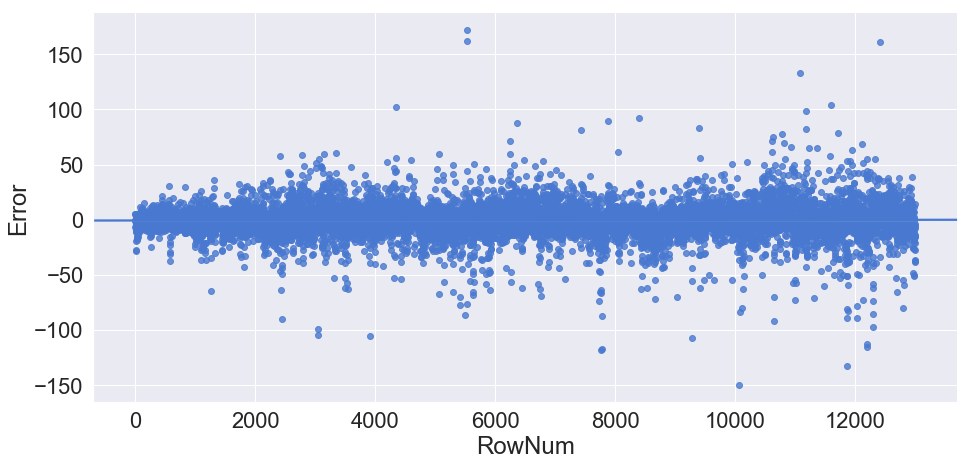

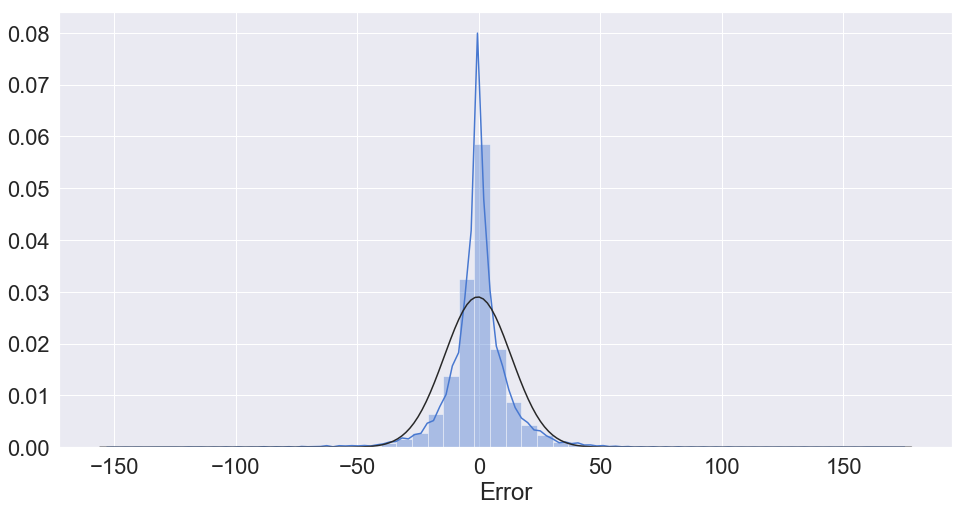

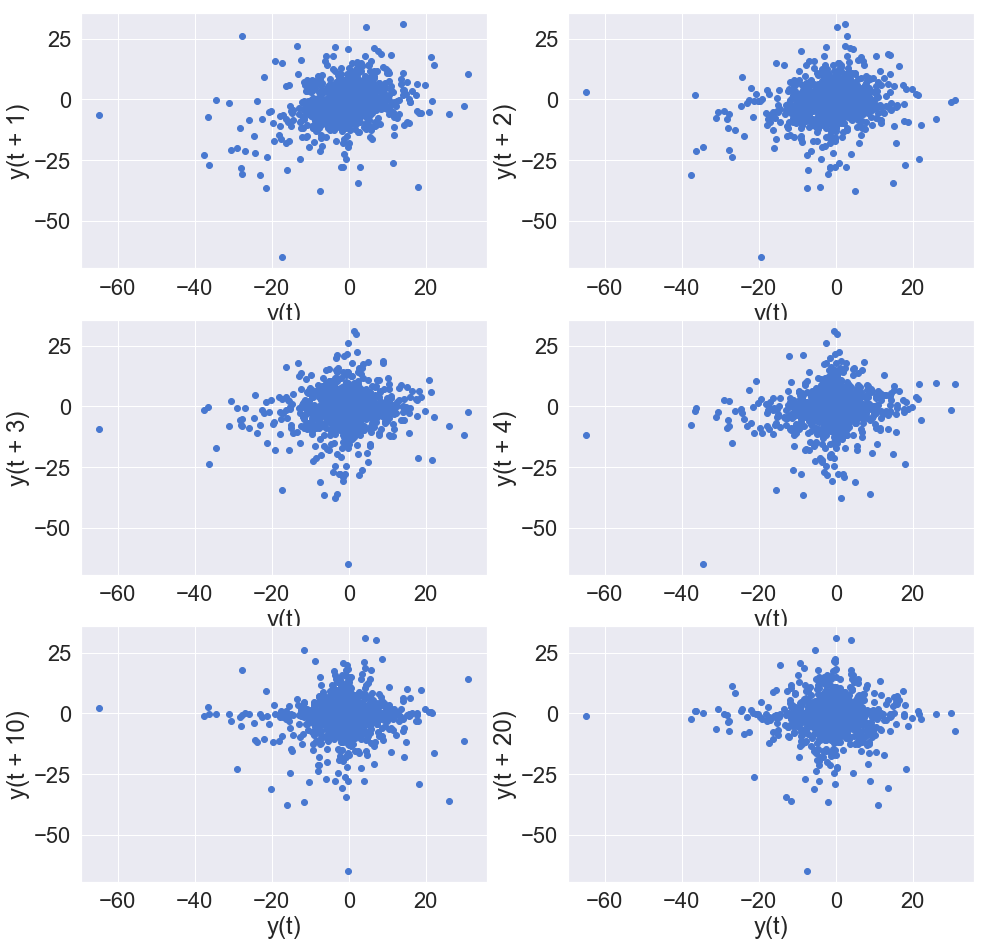

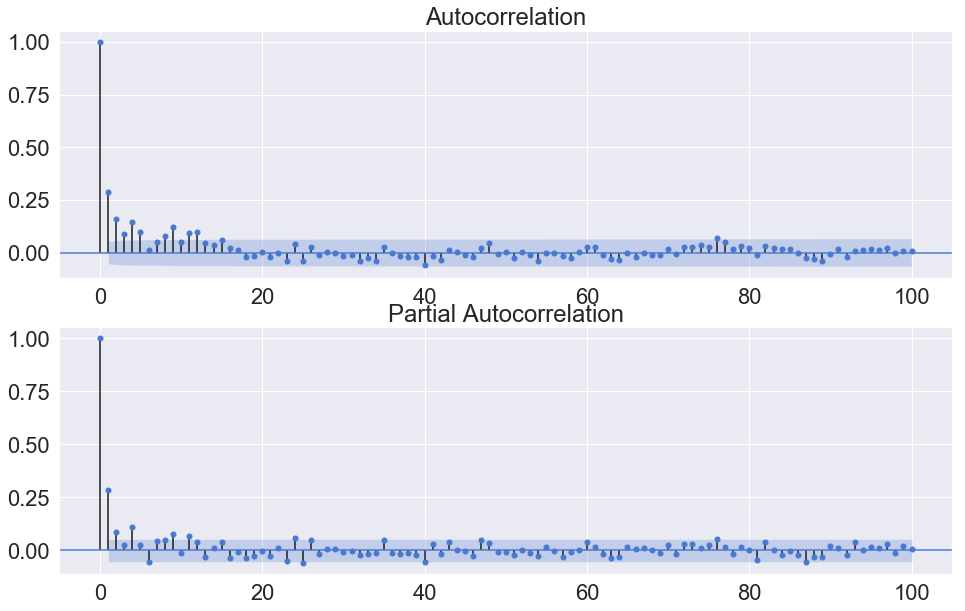

In [11]:
Error_Analysis(Resid_tr_reg8, ['Error'])

# Start Analysis
### [Setting of Analysis]  
> **1. Import Library**  
> **2. Data Loading**  [(Data Source and Description)](https://www.kaggle.com/c/bike-sharing-demand/data)  
> **3. Rearrange of Data**  
> **4. Split of Data: Train, Validate, Test Sets**  
> **5. Descriptive Statistics and Getting Insight from Features**  
> **6. Applying Models**  
> **7. Evaluation**  
> **8. Error Analysis**  
### [Update and Repeat of Analysis]
> **3~5. Feature Engineering**  
* One-hot Encoding  
* Reshape
* Scaling  

> **6. Applying Models**  
> **7. Evaluation**  
> **8. Error Analysis**

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=False)
Accuracy(MAE):  47.463864259597806 degrees
Accuracy(MAPE):  68.6396366468004 %


,importance
Hour,0.607789
atemp,0.083328
temp,0.073734
Quater_ver2,0.056699
workingday,0.035738
DayofWeek,0.030655
humidity,0.024592
Year,0.022521
weather,0.021702
Day,0.013138


Text(0.5,1,'Variable Importances')

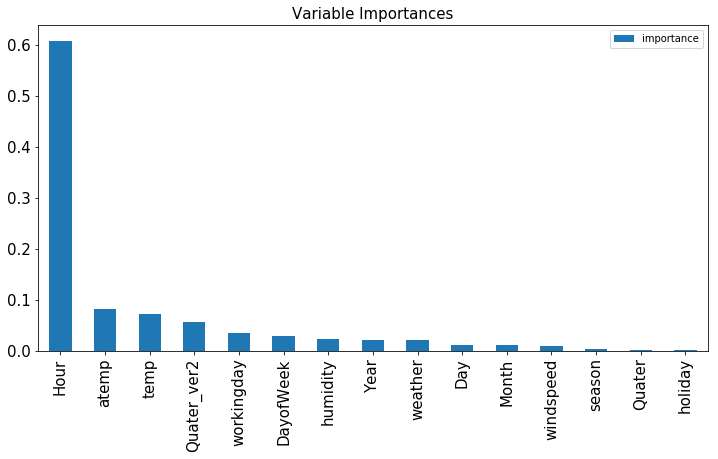

In [116]:
from sklearn.ensemble import RandomForestRegressor

model_fit = RandomForestRegressor(n_estimators=100, random_state=123).fit(X=X_train.values, y=Y_train.values.flatten())
print(model_fit)
model_prediction = model_fit.predict(X=X_test.values)

print('Accuracy(MAE): ', abs(model_prediction - Y_test.values.flatten()).mean(), 'degrees')
print('Accuracy(MAPE): ', (1-(abs(model_prediction - Y_test.values.flatten()) / Y_test.values.flatten()).mean())*100, '%')

# Insert Prediction Figure

Variable_Importances = pd.DataFrame([model_fit.feature_importances_], 
                                    columns=X_train.columns, 
                                    index=['importance']).T.sort_values(by=['importance'], ascending=False)
display(Variable_Importances)
Variable_Importances.plot.bar(figsize=(12,6), fontsize=15)
plt.title('Variable Importances', fontsize=15)